# Fastai2020 - Black Birds

In [3]:
# install dependencies
!pip install -Uqq fastbook
!pip install -Uqq bing-image-downloader

     |████████████████████████████████| 727kB 4.9MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 194kB 12.7MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 10.4MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 2.6MB 28.0MB/s 


In [4]:
# import dependencies
from fastbook import *
from fastai.vision.widgets import *
from bing_image_downloader import downloader

## Gathering the Data

### Download the Data

In [5]:
# set default path and categories
path = Path('birds')
categories = 'crow', 'raven', 'black_bird'
search_terms = 'american crow', 'common raven', 'black bird'

In [ ]:
# download images
for t in search_terms:
    downloader.download(t, limit=100, output_dir=path, timeout=5)

In [7]:
# rename directories to category names
for c, t in zip(categories, search_terms):
    (path/t).rename(path/c)

In [8]:
# get list of images
images = get_image_files(path); images

(#300) [Path('birds/black_bird/Image_9.jpg'),Path('birds/black_bird/Image_50.gif'),Path('birds/black_bird/Image_91.jpeg'),Path('birds/black_bird/Image_41.jpg'),Path('birds/black_bird/Image_6.jpg'),Path('birds/black_bird/Image_27.jpg'),Path('birds/black_bird/Image_26.jpg'),Path('birds/black_bird/Image_76.jpg'),Path('birds/black_bird/Image_64.jpg'),Path('birds/black_bird/Image_2.jpg')...]

In [9]:
# check for failed images
failed = verify_images(images); failed

(#0) []

In [10]:
# delete failed images
failed.map(Path.unlink);

### Create the DataLoders

In [24]:
# create the data block
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)

In [25]:
# instanciate the dataloaders
dls = birds.dataloaders(path)

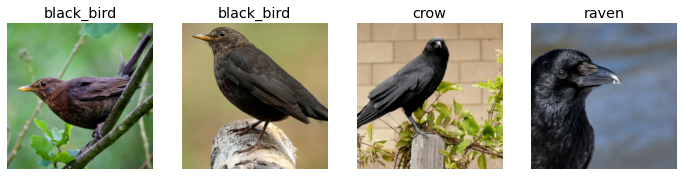

In [13]:
# show a batch of images
dls.valid.show_batch(max_n=4, nrows=1)

## Model 1 - Full Image Set

In [26]:
# train the model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.024164,1.286586,0.450000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.323497,0.936467,0.383333,00:10
1,1.094848,0.763445,0.283333,00:10
2,0.873292,0.726426,0.266667,00:10
3,0.709134,0.616794,0.216667,00:10
4,0.595464,0.551434,0.166667,00:10
5,0.505582,0.524226,0.166667,00:10
6,0.450175,0.507894,0.150000,00:10
7,0.389571,0.504117,0.166667,00:10
8,0.346554,0.501709,0.166667,00:10
9,0.308914,0.506246,0.166667,00:10


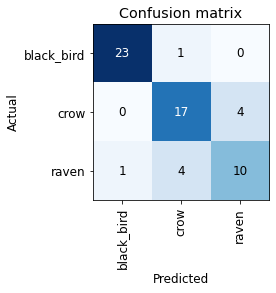

In [27]:
# plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

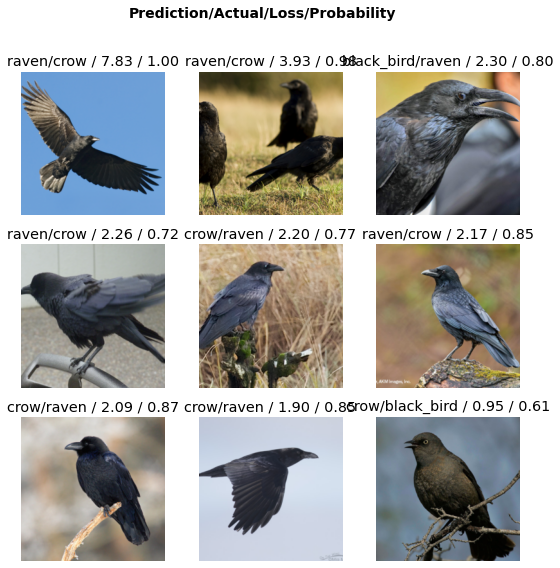

In [29]:
# view top losses
interp.plot_top_losses(9, nrows=3) 

## Data Augmentation

In [30]:
# create new dataloader with augmented data
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = birds.dataloaders(path)

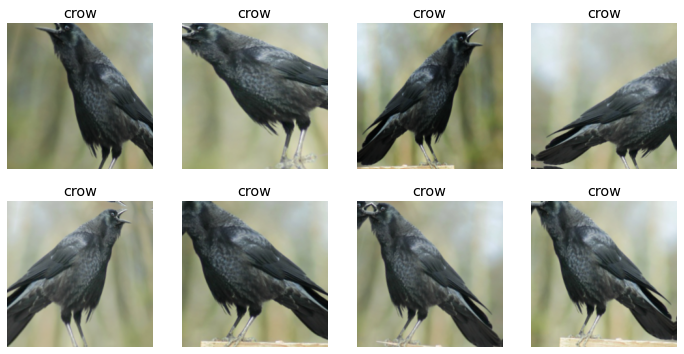

In [31]:
# view sample of augmentation
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Model 2 - Data Augmented

In [32]:
# train model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.932962,1.790158,0.600000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.225724,1.137638,0.533333,00:10
1,1.169054,0.748436,0.383333,00:10
2,1.035584,0.580639,0.250000,00:10
3,0.904734,0.507041,0.200000,00:10
4,0.808830,0.426741,0.183333,00:10
5,0.735478,0.409421,0.166667,00:10
6,0.654108,0.393790,0.116667,00:10
7,0.606860,0.384042,0.133333,00:10
8,0.573118,0.373478,0.116667,00:10
9,0.538747,0.366739,0.116667,00:10


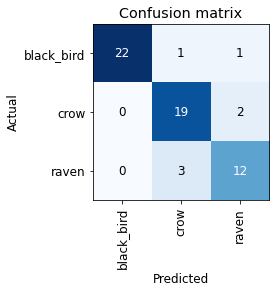

In [33]:
# plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

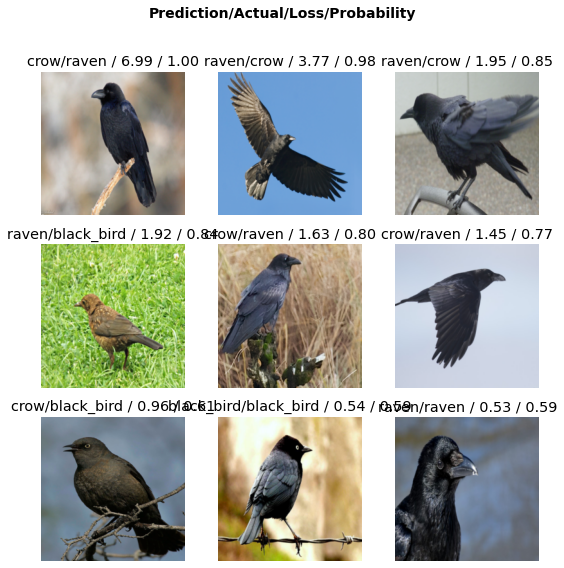

In [34]:
# show top losses
interp.plot_top_losses(9, nrows=3)

In [36]:
learn.export()